# 1. Sistema SIRS

Sea un sistema de susceptibles-infectados-recuperados con pérdida de la inmunidad. Escriba las ecuaciones de la dinámica de campo medio suponiendo que el contagio ocurre a tasa β, que la duración media de la infección es $\tau_I$ y que la de pérdida de inmunidad es $\tau_R$. Demuestre que el punto es:
\begin{equation}
s^∗ = \frac{1}{\beta \tau_I}, \hspace{1cm} \frac{i^∗}{\tau_I} = \frac{r∗}{\tau_R}.
\end{equation}

Demuestre que las oscilaciones son siempre amortiguadas para cualquier valor de los parámetros.

En los modelos SIR, los individuos en estado recuperado obtienen inmunidad total al patógeno, mientras que en los modelos SIRS, esa inmunidad disminuye con el tiempo y los individuos pueden reinfectarse. En base a esto, las ecuaciones en la dinámica de campo medio son 

\begin{align}
    \frac{ds\left(t\right)}{dt} &=  -\beta s\left(t\right)i\left(t\right) + \frac{r}{\tau_{R}}\left(t\right),\\
    \frac{di\left(t\right)}{dt} &=  \beta s\left(t\right)i\left(t\right) - \frac{i}{\tau_{I}}\left(t\right),\\
    \frac{dr\left(t\right)}{dt} &=  \frac{1}{\tau_{I}}i\left(t\right) -\frac{r}{\tau_{R}}\left(t\right),
\end{align}
donde $\beta$ es la tasa de contagio, $\tau_I$ es la duración media de la infección y $\tau_R$ la duración media de la inmunidad. Considerando que no hay demografía, es decir,la población total se conserva tenemos que 

\begin{equation*}
    s\left(t\right) + i\left(t\right) + r\left(t\right) = 1.
\end{equation*}

## Puntos de equilibrio del sistema

Una vez definido el sistema, calculemos los puntos de equilibrio, es decir, pidamos $\dot{s} = \dot{i} = \dot{r}$ en las ecuaciones (1), (2) y (3). Sean $s^*$, $i^*$ y $r^*$ los puntos fijos del sitema, veamos de (3) que 
\begin{equation*}
    \frac{i^*}{\tau_I} = \frac{r^*}{\tau_R},
\end{equation*}
y reemplazando $ i^* = r^* \tau_I / \tau_R$ en (1) llegamos a 
\begin{equation*}
    s^* = \frac{1}{\beta \tau_I}.
\end{equation*}
Por lo tanto, encontramos los dos puntos de equilibrio del sistema como se pedía.

## Análisis de las oscilaciones del sistema

Para analizar las oscilaciones del sistema veamos la estabilidad del punto fijo. En primer lugar, utilizando la condición de conservación de la población, podemos reducir el sistema a dos ecuaciones 
\begin{align*}
    \frac{ds}{dt} &=  -\beta si + \frac{1-s-i}{\tau_{R}},\\
    \frac{di}{dt} &=  \beta si - \frac{i}{\tau_{I}},
\end{align*}
y para analizar estabilidad, linealizamos el sistema en un entorno de los puntos de equilibrio $s^*$ y $i^*$ calculados anteriormente. El Jacobiano para este sistema de dos dimensiones es 

\begin{equation*}
    J = \begin{pmatrix}
        -\beta i - \frac{1}{\tau_R} & -\beta s - \frac{1}{\tau_R} \\
        \beta i     & \beta s - \frac{1}{\tau_I}
    \end{pmatrix}.
\end{equation*}

y evaluado en los puntos fijos $s^* = \frac{1}{\beta \tau_I}$ y $i^* = \frac{\beta \tau_I-1}{\beta \left( \tau_R + \tau_I \right)}$ es

\begin{equation*}
    J|_{\left(s^*,i^*\right)} = 
    \begin{pmatrix}
        -\frac{\tau_I \left( \beta \tau_R + 1 \right)}{\tau_R \left(\tau_I + \tau_R \right)} & -\frac{\tau_R + \tau_I}{\tau_R  \tau_I} \\
        \frac{\beta \tau_I-1}{ \tau_R + \tau_I } & 0
    \end{pmatrix}.
\end{equation*}

Ahora, calculamos la traza y el determinante de $J|_{\left(s^*,i^*\right)}$

\begin{align*}
    \text{tr} \left(J|_{\left(s^*,i^*\right)}\right) = -\frac{\tau_I \left( \beta \tau_R + 1 \right)}{\tau_R \left(\tau_I + \tau_R \right)}, \\
    \det \left(J|_{\left(s^*,i^*\right)}\right) = \frac{\beta \tau_I - 1}{\tau_R \tau_I}.
\end{align*}

Recordando que $\beta$, $\tau_I$, $\tau_R$ son positivos, entonces la traza es negativa. Esto quiere decir que pueden existir espirales estables, es decir oscilaciones amortiguadas que converjan a un punto. Para determinar si efectivamente hay oscilaciones tenemos que pedir que se satisfaga
\begin{equation*}
    (\text{tr} \left(J\right))^2 < 4 \det \left(J\right),
\end{equation*}
luego, debemos encontrar un conjunto de parámetros del sistema que verifique esta condición y tendremos oscilaciones amortiguadas, es decir que cumplan 

\begin{equation*}
    \biggr( \frac{\tau_I}{\tau_R} \biggr)^2 \biggr( \frac{\beta \tau_R + 1}{\tau_I + \tau_R} \biggr)^2   < 4 \frac{\beta \tau_I - 1}{\tau_R \tau_I}
\end{equation*}

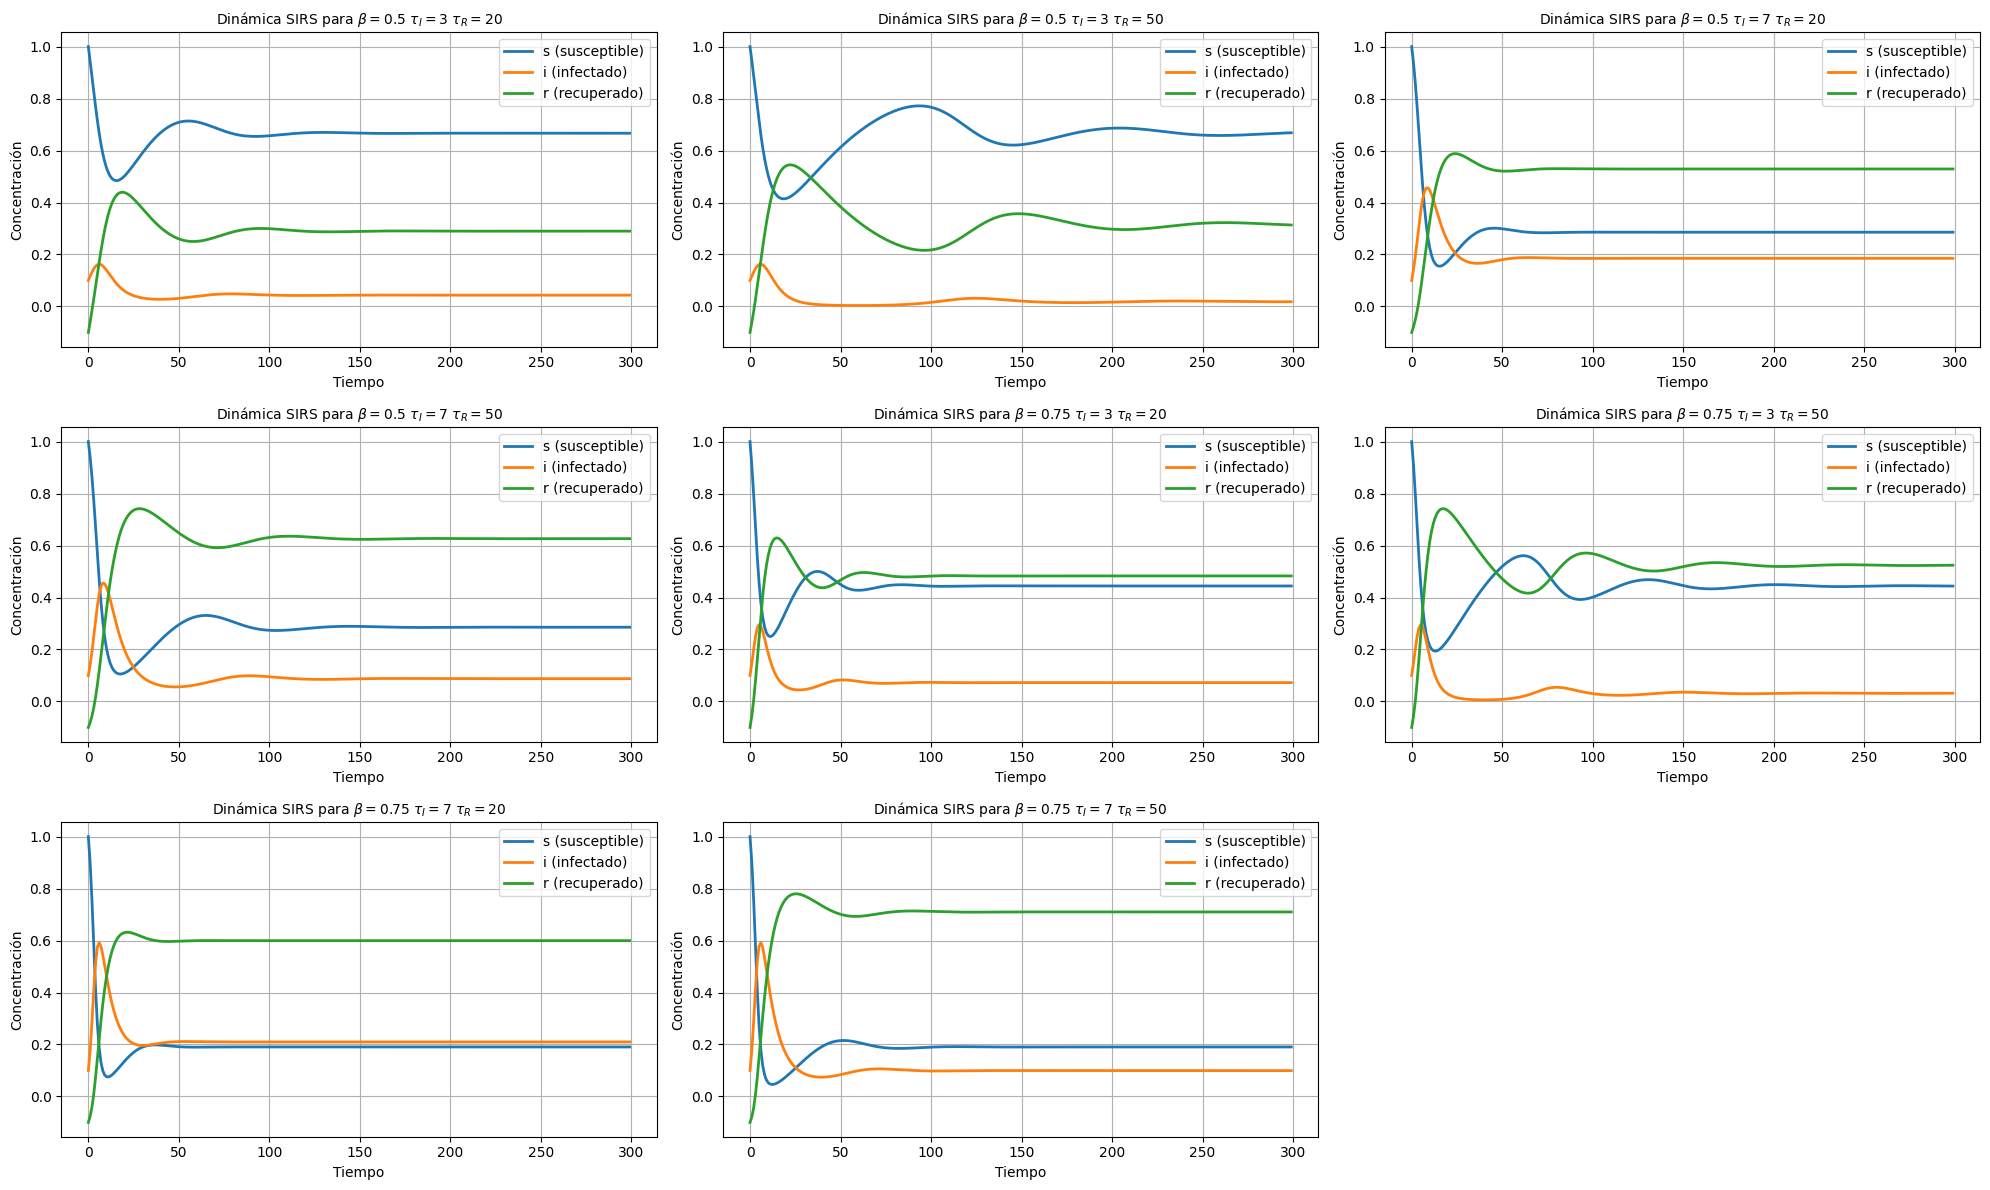

In [131]:
#Gráficas
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def SIRS(x, t, beta, tI, tR):
    s, i = x
    ds = - beta * s * i + 1/tR * (1 - i - s)
    di = beta * s * i - 1/tI * i
    return [ds, di]

betas = [0.5, 0.75]
tIs = [3, 7]
tRs = [20, 50]
x0 = [1.0, 0.1]
t = np.arange(0, 300, 1)

plt.figure(figsize=(20, 12))

subplot_idx = 1
for i, beta in enumerate(betas):
    for j, tI in enumerate(tIs):
        for k, tR in enumerate(tRs):
            res = odeint(SIRS, x0, t, args=(beta, tI, tR))
            s = res[:, 0]
            infect = res[:, 1]
            r = 1 - s - infect
            
            plt.subplot(3, 3, subplot_idx)
            plt.plot(t, s, label='s (susceptible)', linewidth=2)
            plt.plot(t, infect, label='i (infectado)', linewidth=2)
            plt.plot(t, r, label='r (recuperado)', linewidth=2)
            
            plt.xlabel('Tiempo', fontsize='medium')
            plt.ylabel('Concentración', fontsize='medium')
            plt.title(rf"Dinámica SIRS para $\beta = {beta}$ $\tau_I = {tI}$ $\tau_R = {tR}$", fontsize='medium')
            plt.legend()
            plt.grid(True)
            subplot_idx += 1

plt.tight_layout()
plt.show()

En las gráficas podemos ver que para valores de los parámetros que satisfacen $\biggr( \frac{\tau_I}{\tau_R} \biggr)^2 \biggr( \frac{\beta \tau_R + 1}{\tau_I + \tau_R} \biggr)^2  < 4 \frac{\beta \tau_I - 1}{\tau_R \tau_I}$ tenemos oscilaciones amortiguadas como habíamos predicho.

# 2. Glucólisis

La glucólisis es un proceso metabólico fundamental de los seres vivos, mediante el cual obtienen energía descomponiendo azúcar. Un modelo matemático de una de las reacciones involucradas es el siguiente:

\begin{align}
\dot{x}(t) &= -x + ay + x^2y \equiv f(x, y), \\
\dot{y}(t) &= \frac{1}{2} - ay - x^2y \equiv g(x, y),
\end{align}

donde $x(t)$ es la concentración de ADP, $y(t)$ es la de la glucosa-6-fosfato y $a \geq 0$ es un parámetro de la cinética química.

a)  Muestre que hay un único equilibrio (encuéntrelo).

b)  Para $a = \frac{1}{2}$, grafique las nulclinas en el espacio de fases e identifique las regiones donde $f > 0$, $f < 0$, $g > 0$ y $g < 0$. En cada una de estas regiones, indique cualitativamente la dirección del flujo.

c) Analice la estabilidad lineal del equilibrio.

d) Considerando $a$ como un parámetro de control, muestre que existe una bifurcación. Dibuje cualitativamente el flujo en la proximidad del punto fijo para $a < a_c$ y $a > a_c$ ($a_c$ es el valor del parámetro de control donde se produce la bifurcación).

e) Bonus: sabiendo que hay sólo un equilibrio y que las concentraciones no divergen al infinito, explique si existen ciclos de concentración (soluciones periódicas) para algún valor del parámetro $a$.

### Punto de equilibrio del sistema

Para encontrar el equilibrio del sistema, necesitamos encontrar los puntos $(x^*, y^*)$ donde $\dot{x} = \dot{y} = 0$. Es decir, debemos resolver el sistema de ecuaciones:

\begin{equation}
    \begin{cases}
    0 &= -x + ay + x^2 y \\
    0 &= \frac{1}{2} - ay - x^2 y
    \end{cases}
\end{equation}

Resolviendo este sistema de ecuaciones llegamos a que el único punto de equilibrio es $(x^*, y^*) = \left(\frac{1}{2}, \frac{2}{4a +1}\right)$. Dado que $a \ge 0$ no tendremos problema con el denominador. 

### Nulclinas para $a=\frac{1}{2}$.

Las nulclinas del sistema satifacen que $\dot{x} = \dot{y} = 0$, luego estas estarán dadas por 
\begin{equation}
    \begin{cases}
    y &=\frac{x}{a + x^2}, \\
    y &= \frac{1}{2(a + x^2)},
    \end{cases}
\end{equation}
donde, según el enunciado tomamos $a = 1/2$.

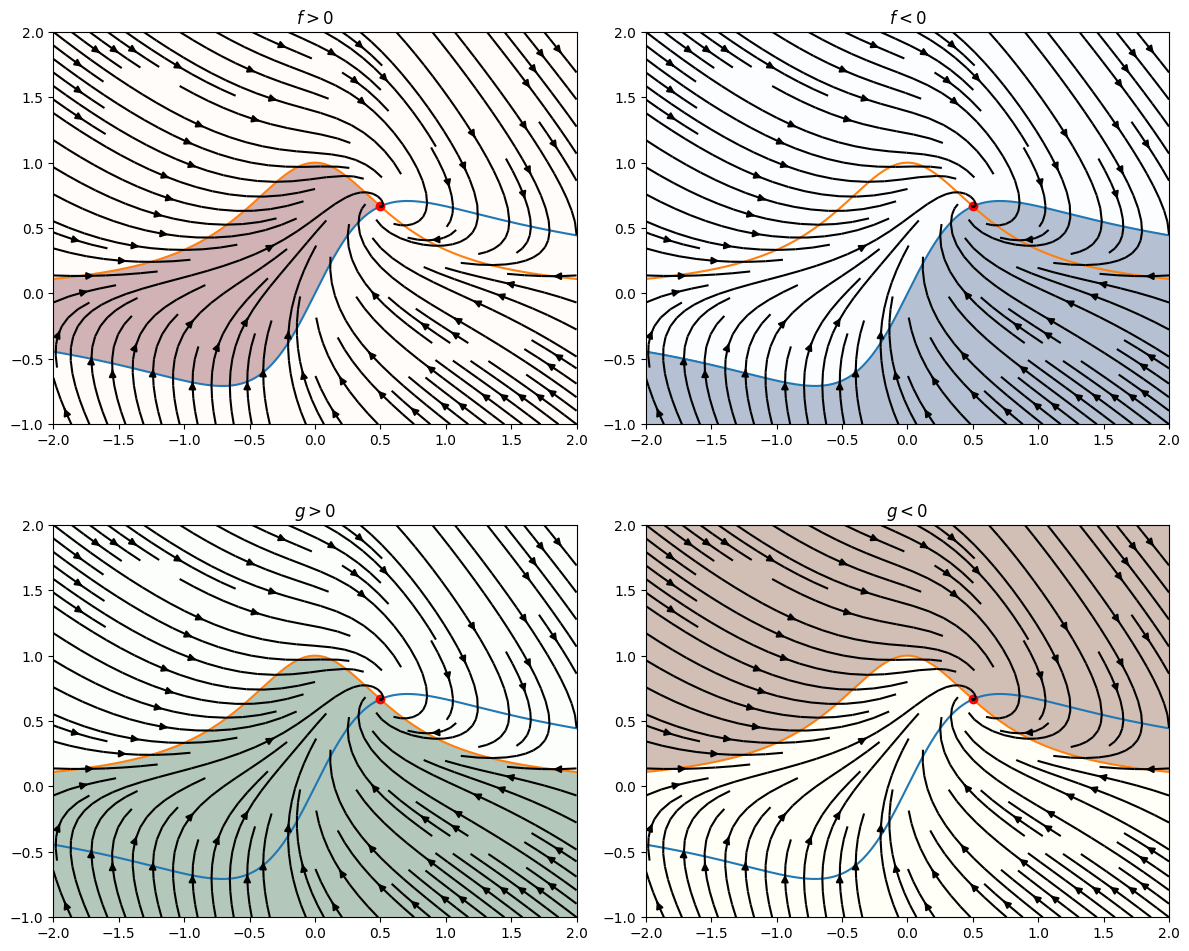

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el parámetro
a = 1/2

# Definir el rango para x y y
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 2, 400)

# Crear la malla de puntos
X, Y = np.meshgrid(x, y)

# Definir las funciones
f = -X + a*Y + X**2*Y
g = 1/2 - a*Y - X**2*Y

# Calcular las nulclinas
y1 = X / (a + X**2)
y2 = 1 / (2 * (a + X**2))

# Punto de equilibrio
x_star = 1/2
y_star = 2 / (4 * a + 1)

# Crear una figura y ejes
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Plot para f > 0
ax[0, 0].imshow((f > 0) & (g>0), extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', alpha=0.3, cmap='Reds')
ax[0, 0].set_title('$f > 0$')
ax[0, 0].plot(x, y1[0], label='$\dot{x}=0$: $y = \\frac{x}{a + x^2}$')
ax[0, 0].plot(x, y2[0], label='$\dot{y}=0$: $y = \\frac{1}{2(a + x^2)}$')
ax[0, 0].plot(x_star, y_star, 'ro', label='Punto de equilibrio')
ax[0, 0].streamplot(X, Y, f, g, color='k')

# Plot para f < 0
ax[0, 1].imshow(f < 0, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', alpha=0.3, cmap='Blues')
ax[0, 1].set_title('$f < 0$')
ax[0, 1].plot(x, y1[0], label='$\dot{x}=0$: $y = \\frac{x}{a + x^2}$')
ax[0, 1].plot(x, y2[0], label='$\dot{y}=0$: $y = \\frac{1}{2(a + x^2)}$')
ax[0, 1].plot(x_star, y_star, 'ro', label='Punto de equilibrio')
ax[0, 1].streamplot(X, Y, f, g, color='k')

# Plot para g > 0
ax[1, 0].imshow(g > 0, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', alpha=0.3, cmap='Greens')
ax[1, 0].set_title('$g > 0$')
ax[1, 0].plot(x, y1[0], label='$\dot{x}=0$: $y = \\frac{x}{a + x^2}$')
ax[1, 0].plot(x, y2[0], label='$\dot{y}=0$: $y = \\frac{1}{2(a + x^2)}$')
ax[1, 0].plot(x_star, y_star, 'ro', label='Punto de equilibrio')
ax[1, 0].streamplot(X, Y, f, g, color='k')

# Plot para g < 0
ax[1, 1].imshow(g < 0, extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', alpha=0.3, cmap='YlOrBr')
ax[1, 1].set_title('$g < 0$')
ax[1, 1].plot(x, y1[0], label='$\dot{x}=0$: $y = \\frac{x}{a + x^2}$')
ax[1, 1].plot(x, y2[0], label='$\dot{y}=0$: $y = \\frac{1}{2(a + x^2)}$')
ax[1, 1].plot(x_star, y_star, 'ro', label='Punto de equilibrio')
ax[1, 1].streamplot(X, Y, f, g, color='k')

plt.tight_layout()
plt.show()

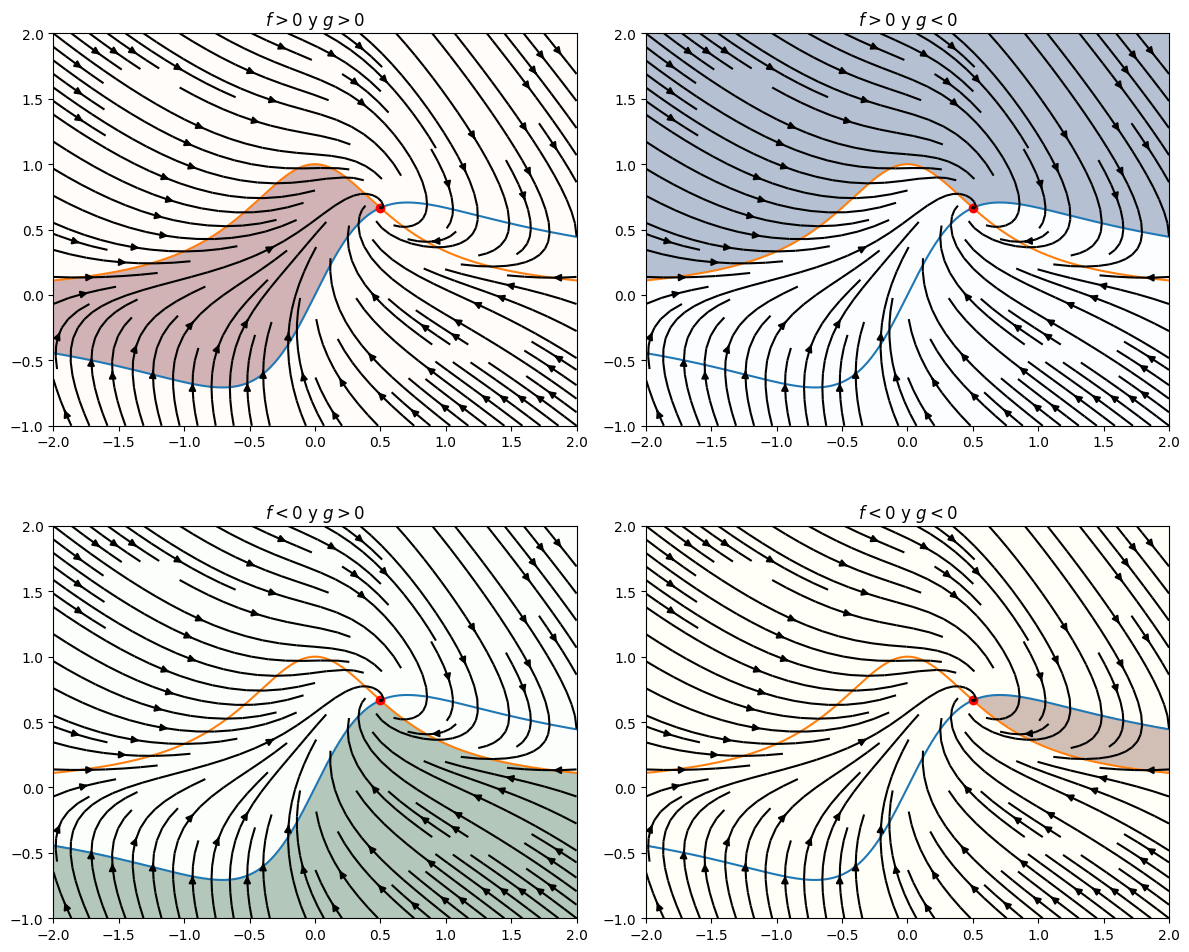

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el parámetro
a = 1/2

# Definir el rango para x y y
x = np.linspace(-2, 2, 400)
y = np.linspace(-1, 2, 400)

# Crear la malla de puntos
X, Y = np.meshgrid(x, y)

# Definir las funciones
f = -X + a*Y + X**2*Y
g = 1/2 - a*Y - X**2*Y

# Calcular las nulclinas
y1 = X / (a + X**2)
y2 = 1 / (2 * (a + X**2))

# Punto de equilibrio
x_star = 1/2
y_star = 2 / (4 * a + 1)

# Crear una figura y ejes
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Plot para f > 0 y g > 0 
ax[0, 0].imshow((f > 0) & (g>0), extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', alpha=0.3, cmap='Reds')
ax[0, 0].set_title(f'$f > 0$ y $g > 0$')
ax[0, 0].plot(x, y1[0], label='$\dot{x}=0$: $y = \\frac{x}{a + x^2}$')
ax[0, 0].plot(x, y2[0], label='$\dot{y}=0$: $y = \\frac{1}{2(a + x^2)}$')
ax[0, 0].plot(x_star, y_star, 'ro', label='Punto de equilibrio')
ax[0, 0].streamplot(X, Y, f, g, color='k')

# Plot para f > 0 y g < 0
ax[0, 1].imshow((f > 0) & (g<0), extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', alpha=0.3, cmap='Blues')
ax[0, 1].set_title(f'$f > 0$ y $g < 0$')
ax[0, 1].plot(x, y1[0], label='$\dot{x}=0$: $y = \\frac{x}{a + x^2}$')
ax[0, 1].plot(x, y2[0], label='$\dot{y}=0$: $y = \\frac{1}{2(a + x^2)}$')
ax[0, 1].plot(x_star, y_star, 'ro', label='Punto de equilibrio')
ax[0, 1].streamplot(X, Y, f, g, color='k')

# Plot para f < 0 y g > 0
ax[1, 0].imshow((f < 0) & (g > 0), extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', alpha=0.3, cmap='Greens')
ax[1, 0].set_title(f'$f < 0$ y $g > 0$')
ax[1, 0].plot(x, y1[0], label='$\dot{x}=0$: $y = \\frac{x}{a + x^2}$')
ax[1, 0].plot(x, y2[0], label='$\dot{y}=0$: $y = \\frac{1}{2(a + x^2)}$')
ax[1, 0].plot(x_star, y_star, 'ro', label='Punto de equilibrio')
ax[1, 0].streamplot(X, Y, f, g, color='k')

# Plot para f<0 y g < 0
ax[1, 1].imshow((f < 0) & (g < 0), extent=[x.min(), x.max(), y.min(), y.max()], origin='lower', alpha=0.3, cmap='YlOrBr')
ax[1, 1].set_title(f'$f < 0$ y $g < 0$')
ax[1, 1].plot(x, y1[0], label='$\dot{x}=0$: $y = \\frac{x}{a + x^2}$')
ax[1, 1].plot(x, y2[0], label='$\dot{y}=0$: $y = \\frac{1}{2(a + x^2)}$')
ax[1, 1].plot(x_star, y_star, 'ro', label='Punto de equilibrio')
ax[1, 1].streamplot(X, Y, f, g, color='k')

plt.tight_layout()
plt.show()

### Analisis de la estabilidad lineal del punto de equilibrio

El jacobiano del sistema nos queda

\begin{equation*}
    J = \begin{pmatrix}
        -1+2xy & a+x^2 \\[6pt]
        -2xy   & -a-x^2
    \end{pmatrix}
\end{equation*}

y evaluando en el punto de equilibrio $(x^*, y^*) = \left(\frac{1}{2}, \frac{2}{4a +1}\right)$ se obtiene  

\begin{equation*}
    J|_{\left(x^*,y^*\right)} = \begin{pmatrix}
        \frac{1-4a}{4a+1} & a+\frac{1}{4} \\[6pt]
        -\frac{2}{4a+1}   & -a-\frac{1}{4}
    \end{pmatrix}.
\end{equation*}
Luego la traza y el determinante del jacobiano están dados por
\begin{align*}
    &\text{tr} \left(J|_{\left(x^*,y^*\right)}\right) =  -a - \frac{5}{4} + \frac{2}{1+4a}\\
    &\det \left(J|_{\left(x^*,y^*\right)}\right) = a+ \frac{1}{4} > 0
\end{align*}

Para obtener más información sobre lo que está sucediendo graficamos la traza del jacobiano y encontramos para qué valor de $a$ se anula.

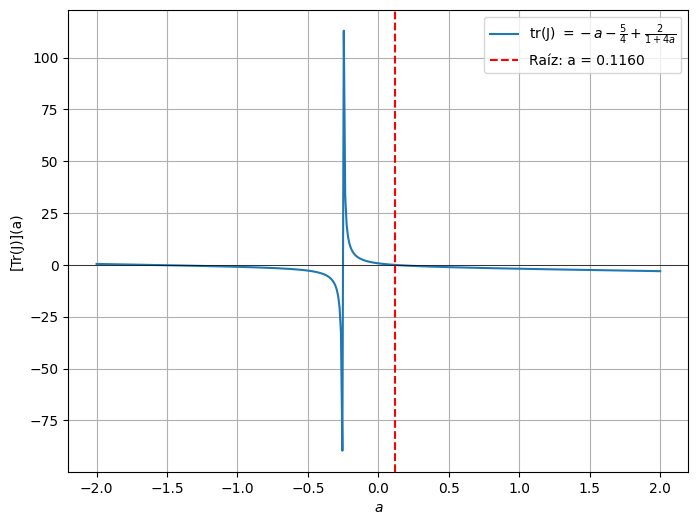

La función se anula en a = 0.1160


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define the function
def func(a):
    return -a - 5/4 + 2/(1 + 4*a)

# Define the range for a
a = np.linspace(-2, 2, 400)

# Evaluate the function
y = func(a)

# Find the root of the function
root = fsolve(func, 0)  # Use 0 as an initial guess

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(a, y, label='tr(J) $= -a - \\frac{5}{4} + \\frac{2}{1+4a}$')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(root, color='red', linestyle='--', label=f'Raíz: a = {root[0]:.4f}')
plt.xlabel('$a$')
plt.ylabel('[Tr(J)](a)')
plt.legend()
plt.grid(True)
plt.show()

# Print the root
print(f'La función se anula en a = {root[0]:.4f}')

Se encontró que la traza se anula para $a = 0.116$, y que para valores menores a este es positiva mientras que para valores mayores es negativa. Luego tenemos que en el intervalo de $a = (0, 0.116)$ el sistema tendrá un equlibrio inestable y para $a > 0.116$ tendrá un equilibrio estable. 

Ahora, dado que estamos buscando una bifurcación, veamos que sucede cuando cuando $ \Delta =(\text{tr} \left(J\right))^2 - 4 \det \left(J\right)$ cambia de signo. Para esto, nuevamente grafiquemos 
\begin{equation}
\Delta(a) = \biggr( -a - 5/4 + \frac{2}{1+4a} \biggr)^2 - 4 \biggr( a + \frac{1}{4} \biggr)
\end{equation}
como función del parámetro $a$

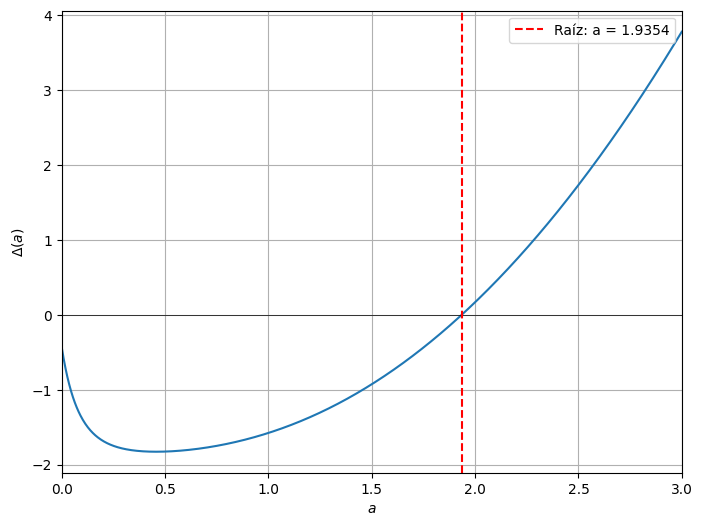

La función se anula en a = 1.9354


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define the function
def func(a):
    return (-a - 5/4 + 2/(1+4*a))**2 - 4*(a + 1/4)

# Define the range for a
a = np.linspace(0, 3, 1000)

# Evaluate the function
y = func(a)

# Find the root of the function
root = fsolve(func, 1)  # Use 0 as an initial guess

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(a, y)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(root, color='red', linestyle='--', label=f'Raíz: a = {root[0]:.4f}')
plt.xlabel('$a$')
plt.ylabel('$\Delta(a)$')
plt.legend()
plt.grid(True)
plt.xlim(0,3)
plt.show()

# Print the root
print(f'La función se anula en a = {root[0]:.4f}')

Encontramos que $\Delta$ cambia de signo para $a=1.9354$. Esto nos permite deducir que para $a$ en el intervalo $(0,0.116)$ tenemos una espiral inestable ya que $\Delta <0$ y $\text{tr} \left(J\right)>0$. Para $a$ en el intervalo $(0.116, 1.9354)$ tenemos una espiral estable ya que $\Delta <0$ y $\text{tr} \left(J\right)<0$. Finalmente, para $a > 1.9354$, el equilibrio pasa a ser un nodo estable ya que $\Delta >0$ y $\text{tr} \left(J\right)<0$.

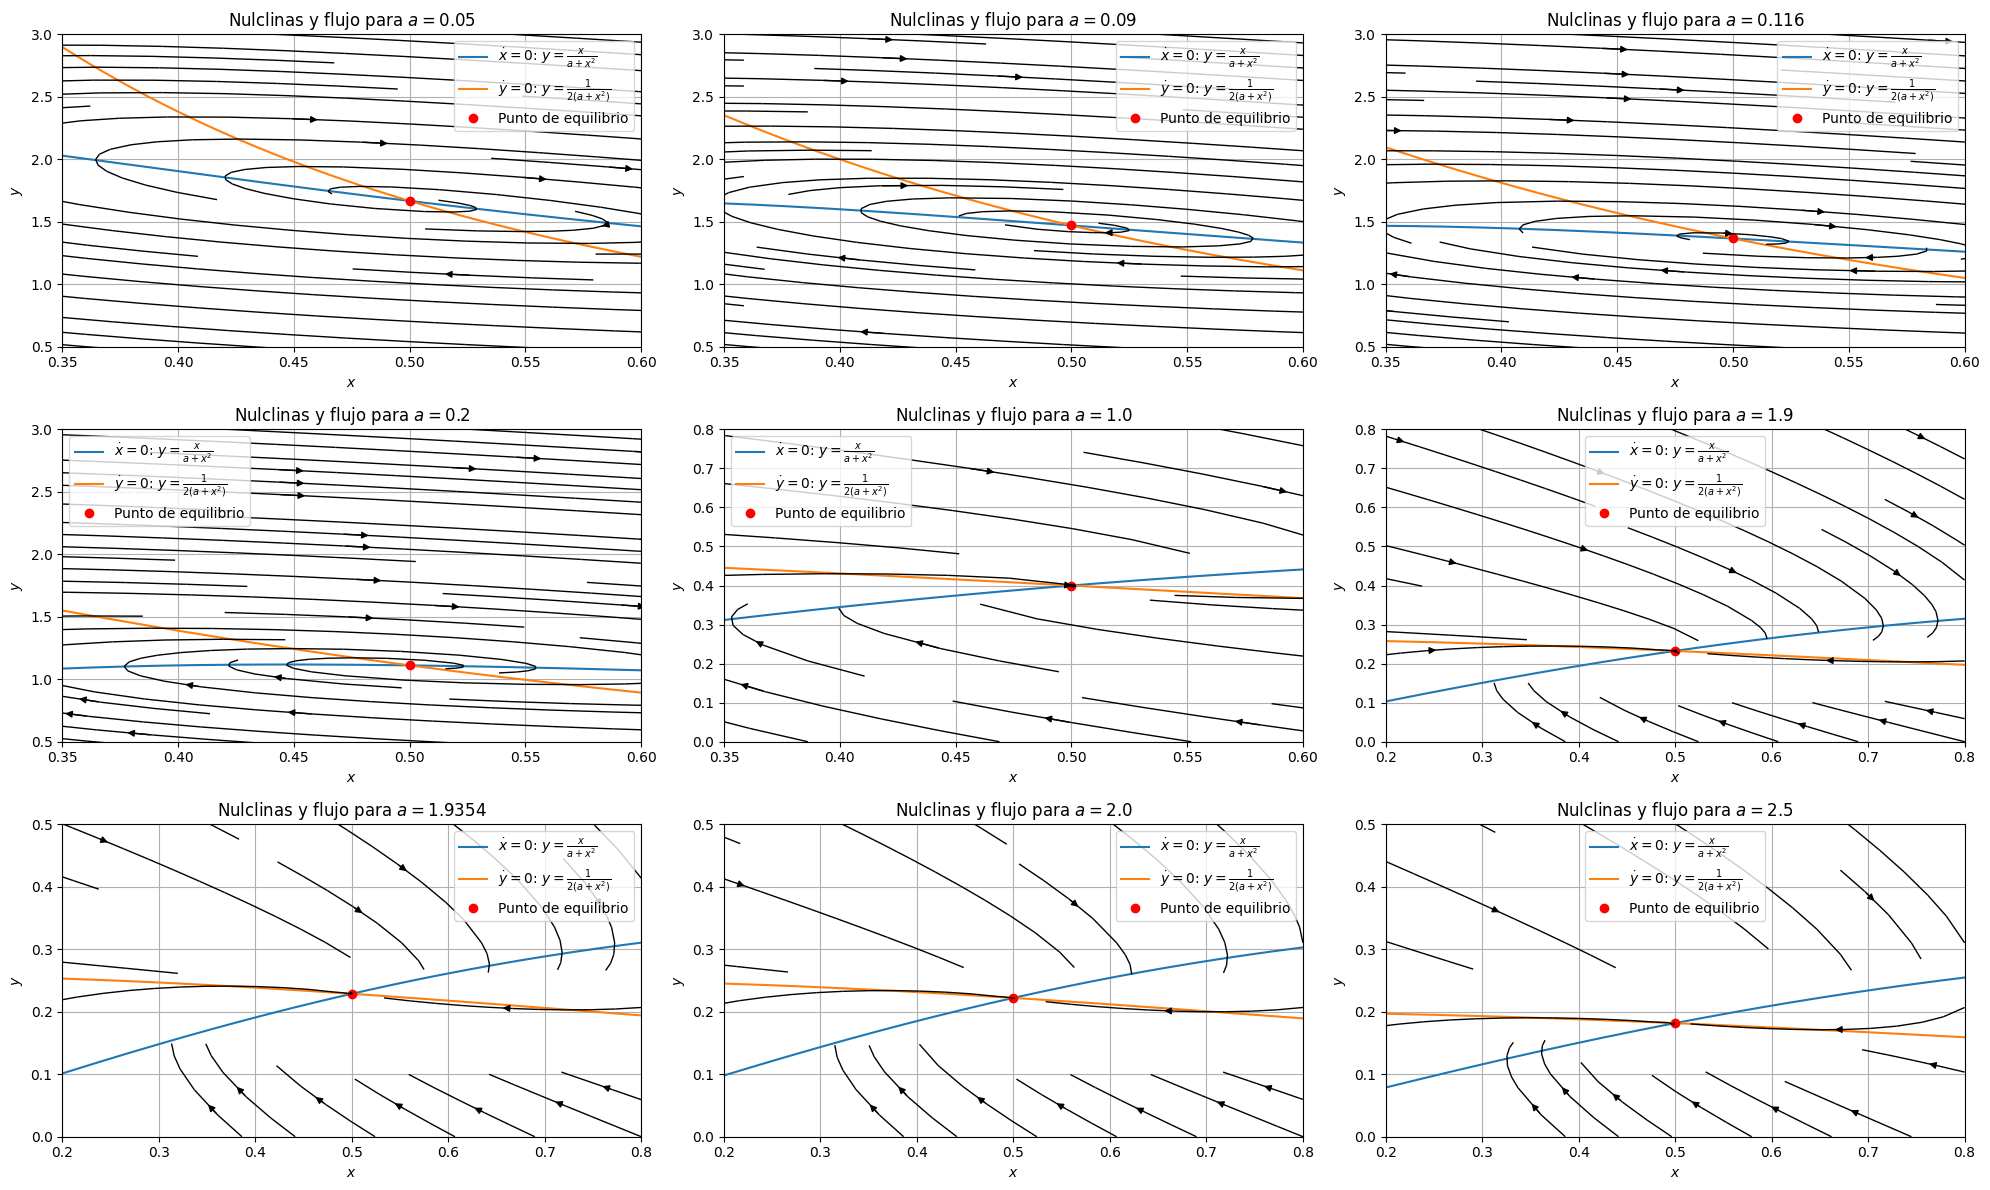

In [117]:
import numpy as np
import matplotlib.pyplot as plt

# Definir los valores de a para analizar
a_values = [0.05, 0.09, 0.116, 0.2, 1.0, 1.9, 1.9354, 2.0, 2.5]

# Definir el rango para x y y
x = np.linspace(0, 0.8, 5000)
y = np.linspace(0, 3, 5000)

# Crear la malla de puntos
X, Y = np.meshgrid(x, y)

# Crear una figura y ejes
fig, ax = plt.subplots(3, 3, figsize=(20, 12))

# Límites específicos para cada figura (modificar según sea necesario)
x_limits = [
    [0.35, 0.6], [0.35, 0.6], [0.35, 0.6],
    [0.35, 0.6], [0.35, 0.6], [0.2, 0.8],
    [0.2, 0.8], [0.2, 0.8], [0.2, 0.8]
]

y_limits = [
    [0.5, 3], [0.5, 3], [0.5, 3],
    [0.5, 3], [0, 0.8], [0, 0.8],
    [0, 0.5], [0, 0.5], [0, 0.5]
]

for i, a in enumerate(a_values):
    # Definir las funciones
    f = -X + a*Y + X**2*Y
    g = 1/2 - a*Y - X**2*Y

    # Calcular las nulclinas
    y1 = X / (a + X**2)
    y2 = 1 / (2 * (a + X**2))

    # Punto de equilibrio
    x_star = 1/2
    y_star = 2 / (4 * a + 1)

    # Seleccionar el subplot adecuado
    ax_current = ax[i // 3, i % 3]

    # Graficar las nulclinas y el flujo
    ax_current.plot(x, x / (a + x**2), label='$\dot{x}=0$: $y = \\frac{x}{a + x^2}$')
    ax_current.plot(x, 1 / (2 * (a + x**2)), label='$\dot{y}=0$: $y = \\frac{1}{2(a + x^2)}$')
    ax_current.plot(x_star, y_star, 'ro', label='Punto de equilibrio')
    ax_current.streamplot(X, Y, f, g, color='k', linewidth=1)
    ax_current.set_title(f'Nulclinas y flujo para $a = {a}$')
    ax_current.set_xlim(x_limits[i])
    ax_current.set_ylim(y_limits[i])
    ax_current.set_xlabel('$x$')
    ax_current.set_ylabel('$y$')
    ax_current.legend()
    ax_current.grid(True)

plt.tight_layout()
plt.show()

En cuanto al bonus, para $a = 0.116$ tenemos que $\text{det} \left(J\right) > 0$ y $\text{tr} \left(J\right)=0$ tenemos un centro. Luego en el valor del parámetro $a$ en que la espiral pasa de inestable a estable tenemos oscilaciones periodicas.

# 3. Osciladores acoplados

Resuelva numéricamente el sistema de osciladores de fase acoplados:
\begin{equation}
    \dot{\theta_i} = \omega_i + \frac{k}{N} \sum_{j=1}^N sin(\theta_j − \theta_i),
\end{equation}
para $N \approx 5$ osciladores. Grafique la fase y la frecuencia de todos ellos en función del tiempo, y verifique que, para cada conjunto de frecuencias naturales $\omega_i$, un acoplamiento $k$ suficientemente fuerte produce la sincronización de frecuencias. Verifique, cambiando las frecuencias naturales, que la frecuencia de sincronización es el promedio de las frecuencias naturales.

### Valor de $k$ para el cual se sincronizan las frecuencias para frecuencias naturales cercanas

Dado un sistema con 5 osciladores y frecuencias naturales cercanas ($\omega_i = 0.2,0.4,0.6,0.8,1.0$) queremos estudiar el valor de $k$ para el cual se sincronizan los osciladores. Para ello realizamos simulaciones para distintos valores de $k$, donde la fase inicial de cada oscilador es un número aleatorio entre 0 y $2\pi$.

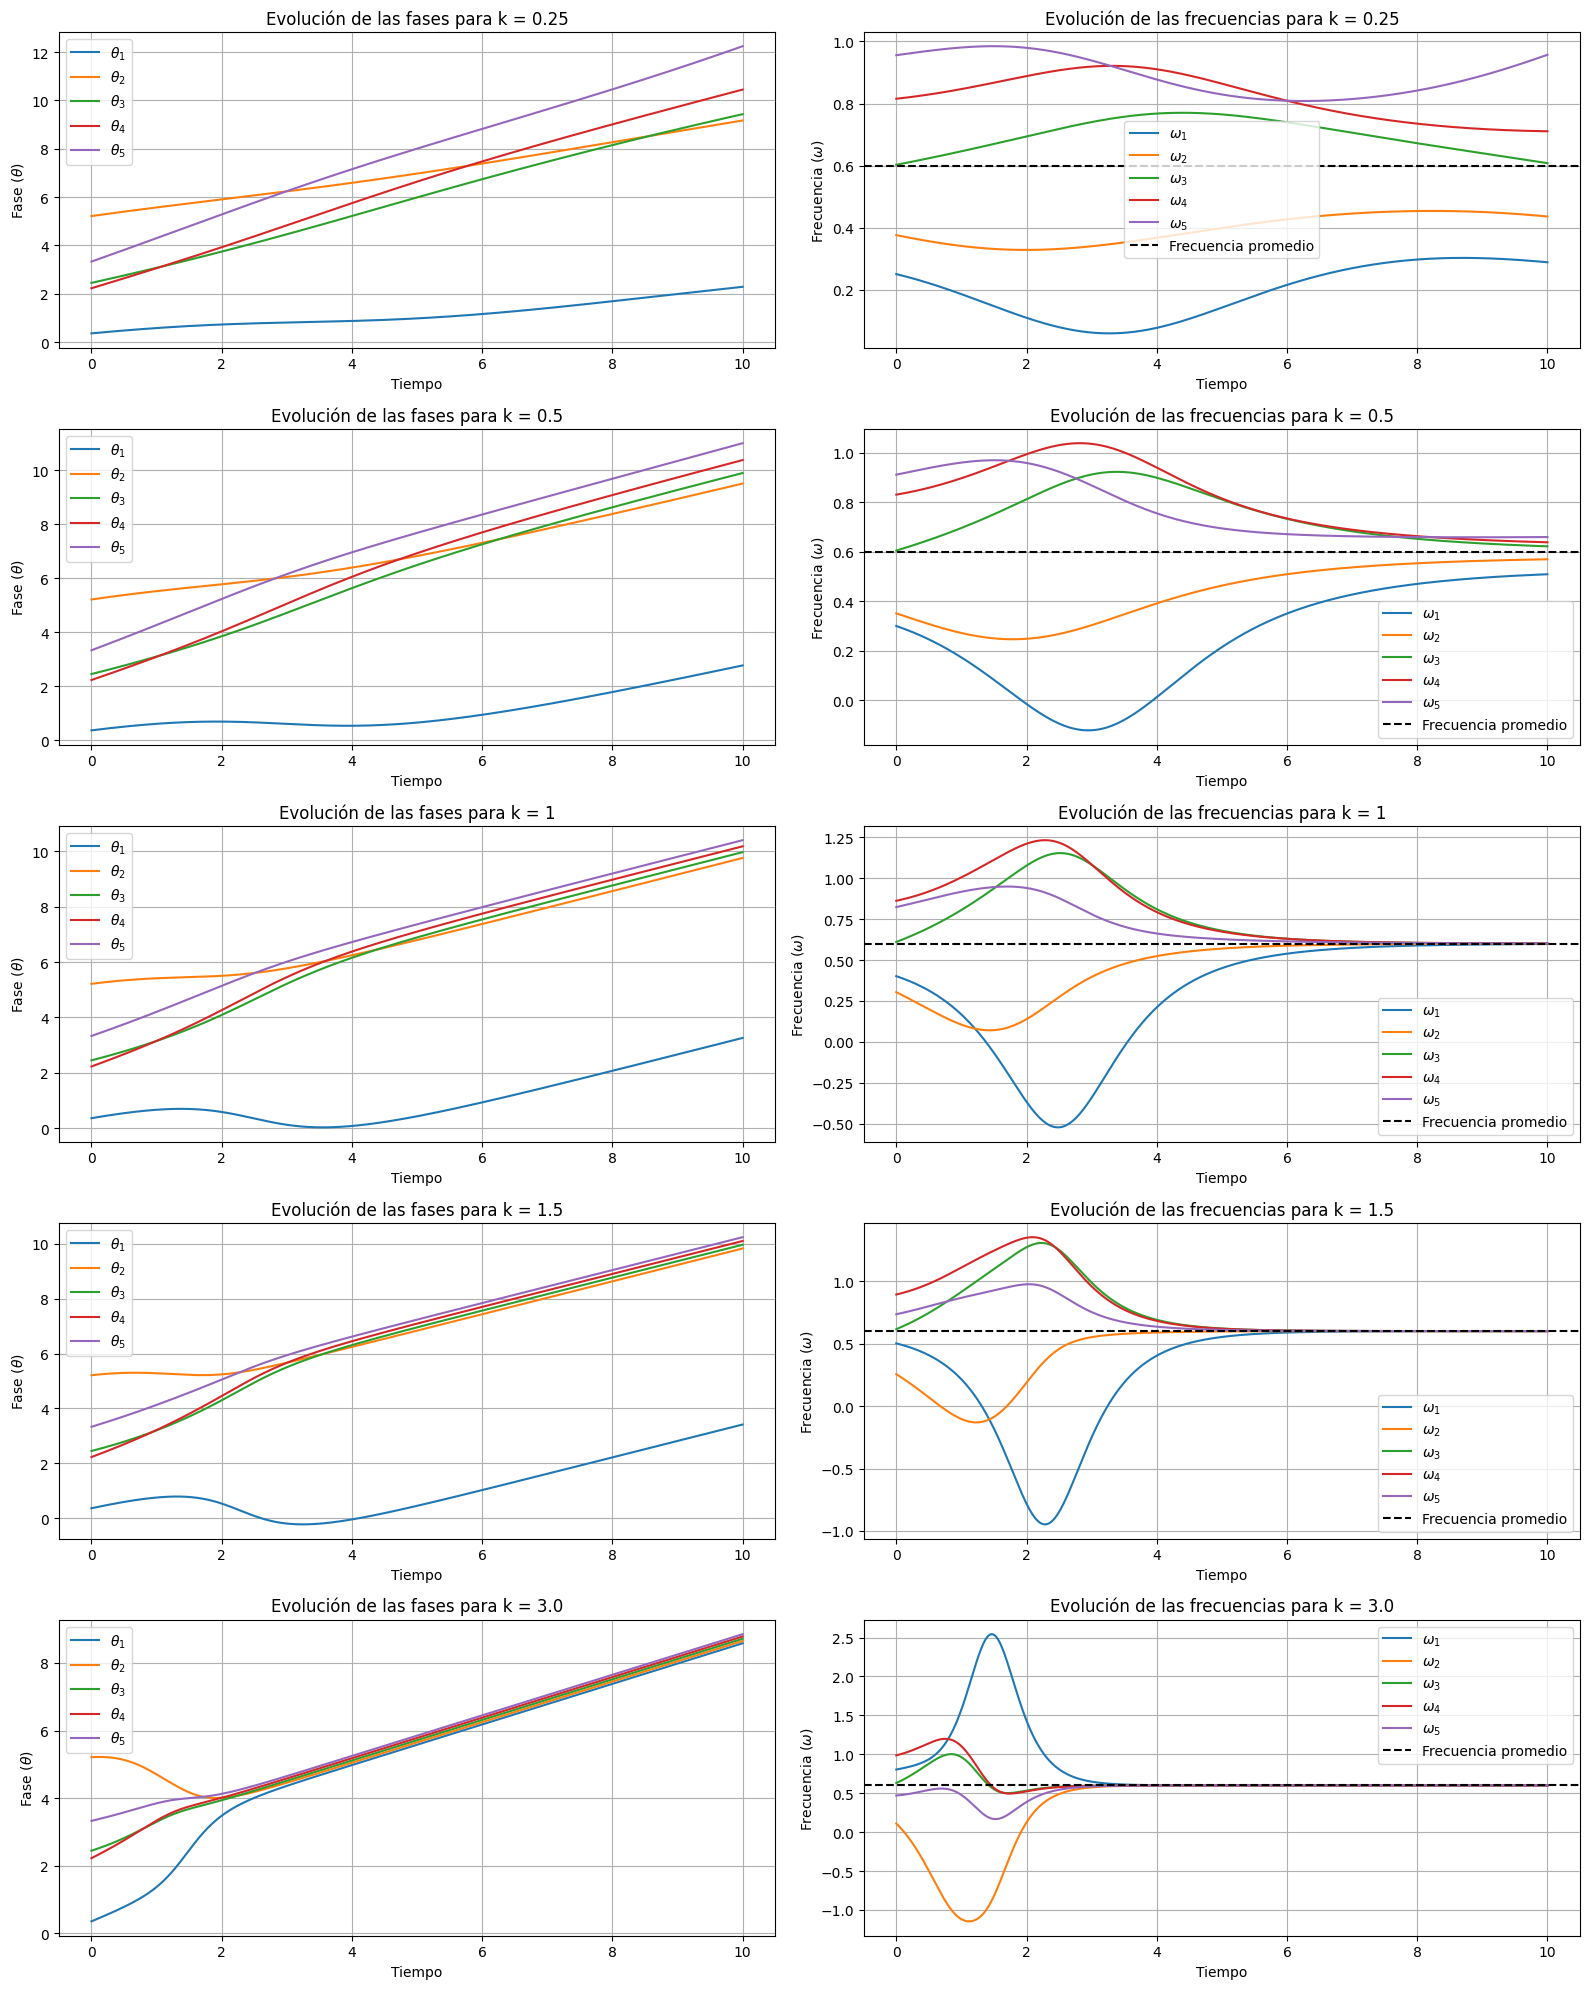

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def dtheta_dt(theta, t, omega_n, k, N):
    dtheta = np.zeros(N)
    for i in range(N):
        sum_sin = 0.0
        for j in range(N):
            if j != i:
                sum_sin += np.sin(theta[j] - theta[i])
        dtheta[i] = omega_n[i] + (k / N) * sum_sin
    return dtheta

# Parámetros del sistema
N = 5  # Número de osciladores
omega_n = [0.2, 0.4, 0.6, 0.8, 1]
ks = [0.25, 0.5, 1, 1.5, 3.0]  # Lista de valores de k para iterar

# Condiciones iniciales
theta_0 = np.random.uniform(0, 2*np.pi, N)

# Tiempo de integración
t = np.linspace(0, 10, 1000)

# Figuras para las fases y frecuencias
fig, axs = plt.subplots(len(ks), 2, figsize=(16, 4*len(ks)))

# Iterar sobre diferentes valores de k
for idx, k in enumerate(ks):
    # Integración de las ecuaciones utilizando odeint
    fase = odeint(dtheta_dt, theta_0, t, args=(omega_n, k, N)).T
    
    # Calcular las frecuencias
    frec = np.zeros((N, len(t)))  # Inicializar matriz para almacenar frecuencias de cada oscilador
    
    for i in range(len(t)):
        frec[:, i] = dtheta_dt(fase[:, i], t[i], omega_n, k, N)
    
    # Graficar las fases en función del tiempo
    for i in range(N):
        axs[idx, 0].plot(t, fase[i], label=f'$\\theta_{i+1}$')
    axs[idx, 0].set_xlabel('Tiempo')
    axs[idx, 0].set_ylabel('Fase ($\\theta$)')
    axs[idx, 0].set_title(f'Evolución de las fases para k = {k}')
    axs[idx, 0].legend()
    axs[idx, 0].grid(True)
    
    # Graficar las frecuencias en función del tiempo
    for i in range(N):
        axs[idx, 1].plot(t, frec[i], label=f'$\\omega_{i+1}$')
    axs[idx, 1].axhline(y=np.mean(omega_n), color='k', linestyle='--', label='Frecuencia promedio')
    axs[idx, 1].set_xlabel('Tiempo')
    axs[idx, 1].set_ylabel('Frecuencia ($\\omega$)')
    axs[idx, 1].set_title(f'Evolución de las frecuencias para k = {k}')
    axs[idx, 1].legend()
    axs[idx, 1].grid(True)

plt.tight_layout()
plt.show()


Para los valores de $k=0.25,0.5$ vemos que los osciladores no se sincronizan, mientras que para $k=1.0,1.5,3.0$ vemos que sí se sincronizan. Esto lo podemos ver de dos maneras distintas: En las curvas fase vs tiempo la sincronización ocurre cuando las curvas para cada oscilador son rectas con la misma pendiente; en las curvas frecuencia vs tiempo la sincronización ocurre cuando todas las curvas convergen a la frecuencia promedio.



### Valor de $k$ para el cual se sincronizan las frecuencias para frecuencias naturales lejanas

Ahora estudiemos el mismo sistema con 5 osciladores pero con frecuencias naturales lejanas ($\omega_i = 1, 5, 15, 20, 50$). Para ello realizamos simulaciones para distintos valores de $k$, donde la fase inicial de cada oscilador es un número aleatorio entre 0 y $2\pi$.

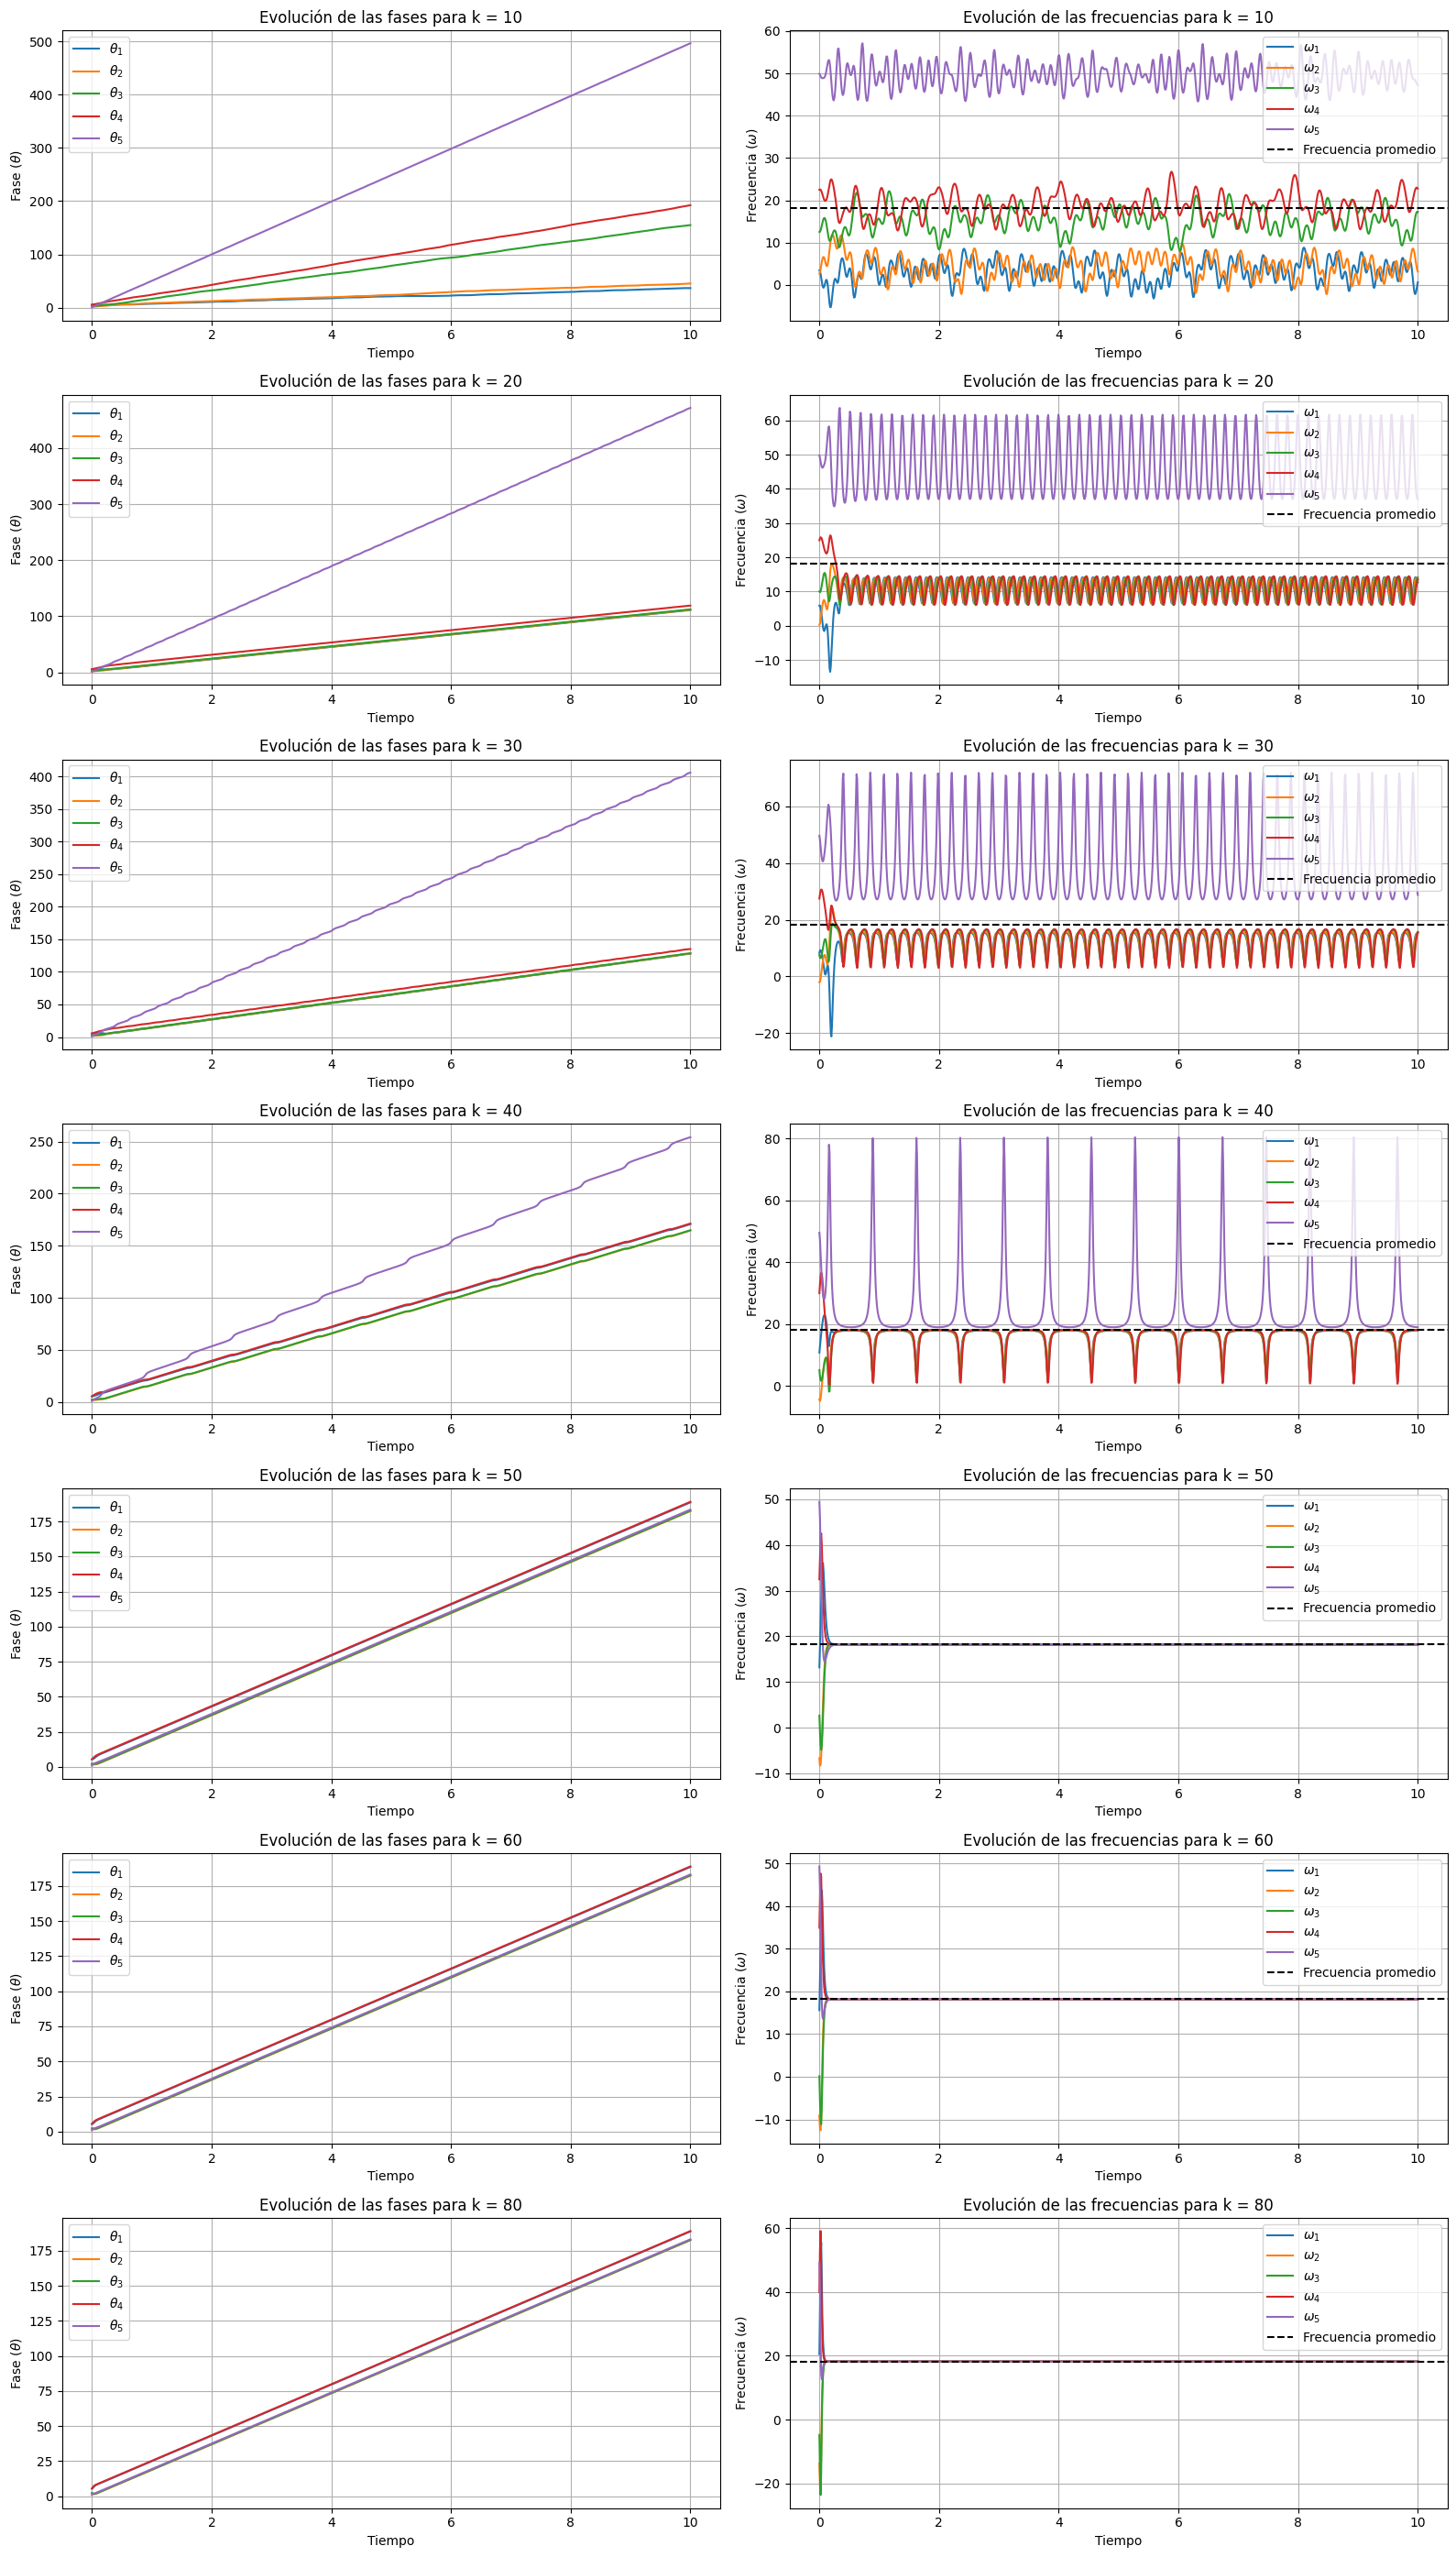

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def dtheta_dt(theta, t, omega_n, k, N):
    dtheta = np.zeros(N)
    for i in range(N):
        sum_sin = 0.0
        for j in range(N):
            if j != i:
                sum_sin += np.sin(theta[j] - theta[i])
        dtheta[i] = omega_n[i] + (k / N) * sum_sin
    return dtheta

# Parámetros del sistema
N = 5  # Número de osciladores
omega_n = [1, 5, 15, 20, 50]
ks = [10, 20, 30, 40, 50, 60, 80]  # Lista de valores de k para iterar

# Condiciones iniciales
theta_0 = np.random.uniform(0, 2*np.pi, N)

# Tiempo de integración
t = np.linspace(0, 10, 1000)

# Figuras para las fases y frecuencias
fig, axs = plt.subplots(len(ks), 2, figsize=(16, 4*len(ks)))

# Iterar sobre diferentes valores de k
for idx, k in enumerate(ks):
    # Integración de las ecuaciones utilizando odeint
    fase = odeint(dtheta_dt, theta_0, t, args=(omega_n, k, N)).T
    
    # Calcular las frecuencias
    frec = np.zeros((N, len(t)))  # Inicializar matriz para almacenar frecuencias de cada oscilador
    
    for i in range(len(t)):
        frec[:, i] = dtheta_dt(fase[:, i], t[i], omega_n, k, N)
    
    # Graficar las fases en función del tiempo
    for i in range(N):
        axs[idx, 0].plot(t, fase[i], label=f'$\\theta_{i+1}$')
    axs[idx, 0].set_xlabel('Tiempo')
    axs[idx, 0].set_ylabel('Fase ($\\theta$)')
    axs[idx, 0].set_title(f'Evolución de las fases para k = {k}')
    axs[idx, 0].legend()
    axs[idx, 0].grid(True)
    
    # Graficar las frecuencias en función del tiempo
    for i in range(N):
        axs[idx, 1].plot(t, frec[i], label=f'$\\omega_{i+1}$')
    axs[idx, 1].axhline(y=np.mean(omega_n), color='k', linestyle='--', label='Frecuencia promedio')
    axs[idx, 1].set_xlabel('Tiempo')
    axs[idx, 1].set_ylabel('Frecuencia ($\\omega$)')
    axs[idx, 1].set_title(f'Evolución de las frecuencias para k = {k}')
    axs[idx, 1].legend()
    axs[idx, 1].grid(True)

plt.tight_layout()
plt.show()


En este caso vemos que para $k=50,60,80$ los 5 osciladores se sincronizan y su frecuencia converge a la frecuencia natural promedio. No obstante, es interesante ver como para $k=40$, 4 de los 5 osciladores sincronizan su frecuencia a cada tiempo, pero esta frecuencia no es constante en el tiempo como ocurre para valores de $k$ más grandes. Es decir, estos 4 osciladores se comportan como si fueran un solo oscilador con frecuencia variable.